In [3]:
#imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools

In [4]:
#array creation
array_of_features = pd.read_csv("kmeans_pca_80.csv")

pca_feat = pd.read_csv("pca_80.csv")

feature_data = pd.read_csv("relevant_features_single_tags.csv")
feature_data["loudness"] *= -1
for column in feature_data.keys():
    feature_data[column] = feature_data[column] /feature_data[column].abs().max()
array_of_standardized_features = feature_data


# standardized_labels = pd.read_csv("kmeans_3_standardized.csv")

# array_of_standardized_features.loc[:,"Labels"] = standardized_labels.loc[:,"Labels"]

# list_of_rows = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]
list_of_rows = ["0", "1", "2", "3", "4", "5", "6"]

# nonnormalized data (still give some ok data)

# list_of_rows += ["loudness"]
# list_of_rows += ["tempo"]

#list_of_rows += ["duration_ms"]

#discrete data (messes up graphs)
#list_of_rows += ["key"]
#list_of_rows += ["mode"]
#list_of_rows += ["time_signature"]

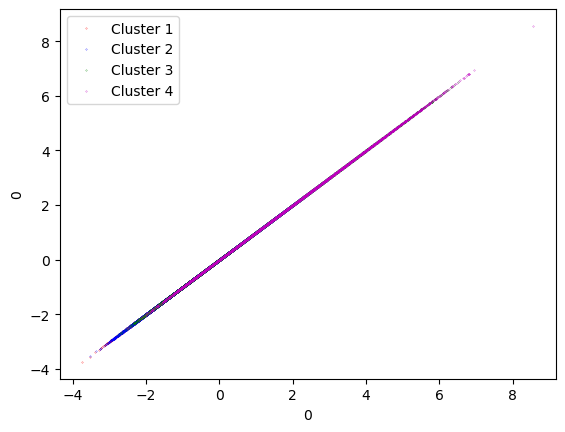

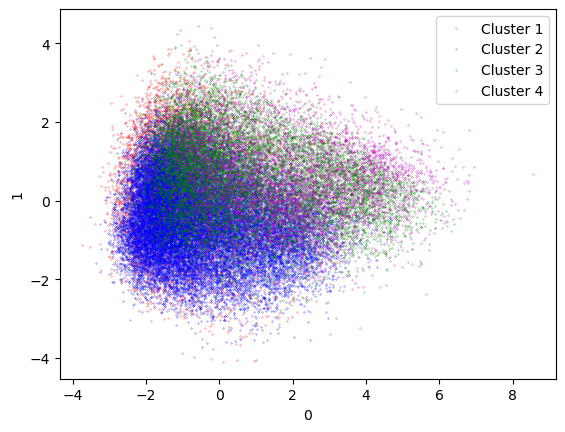

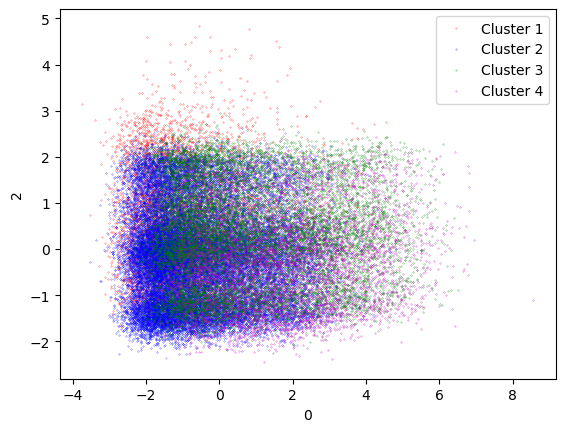

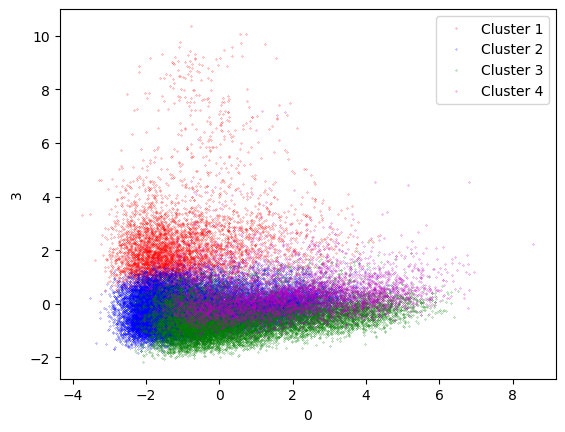

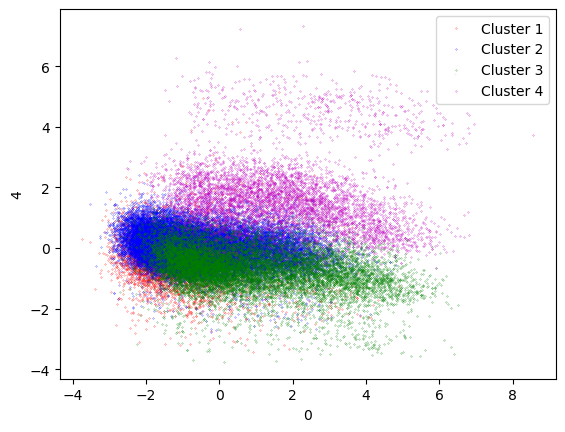

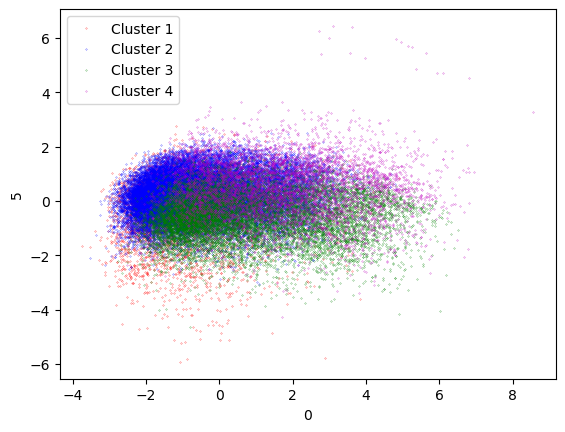

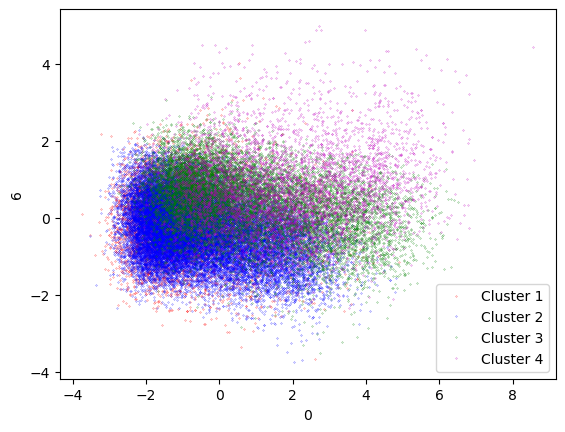

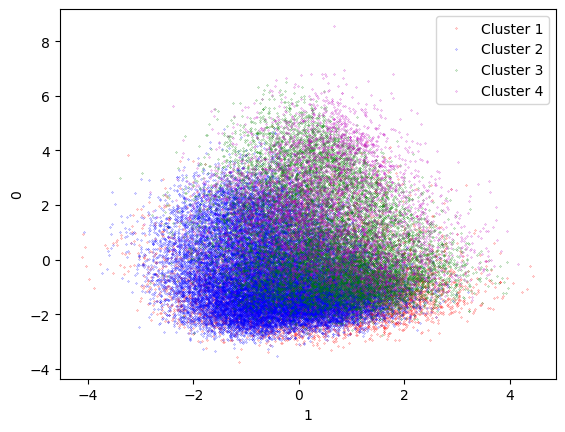

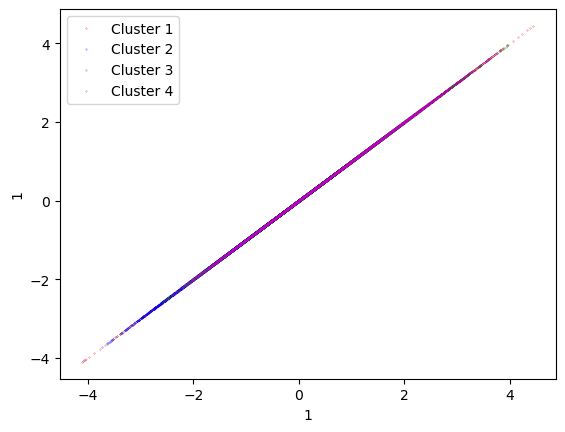

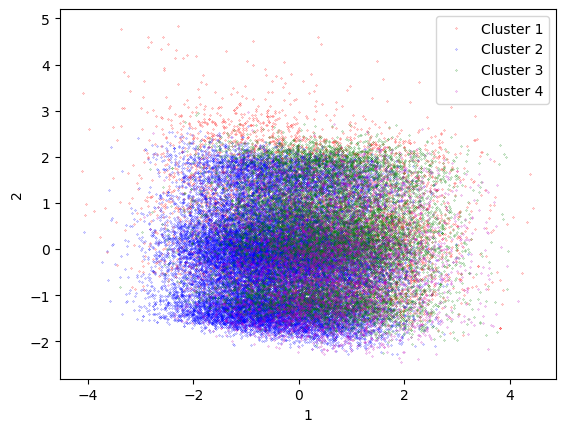

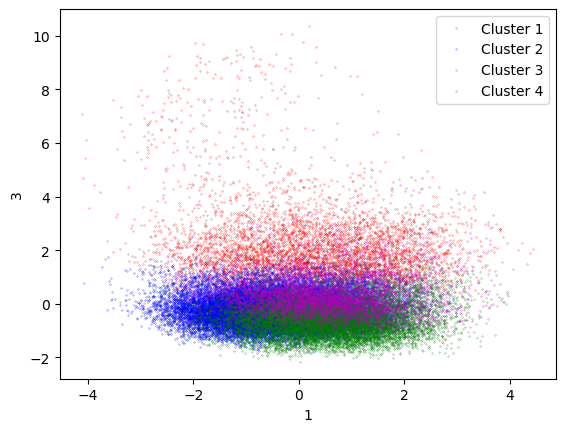

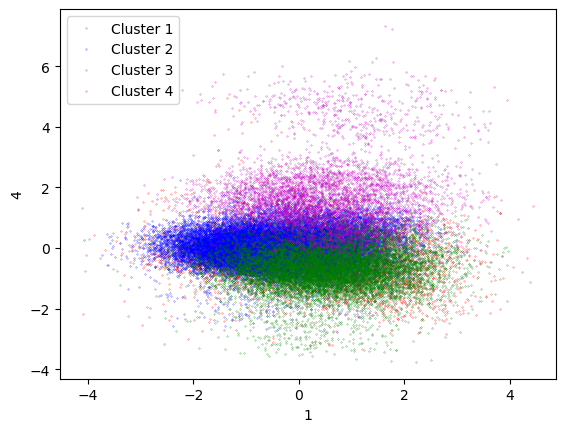

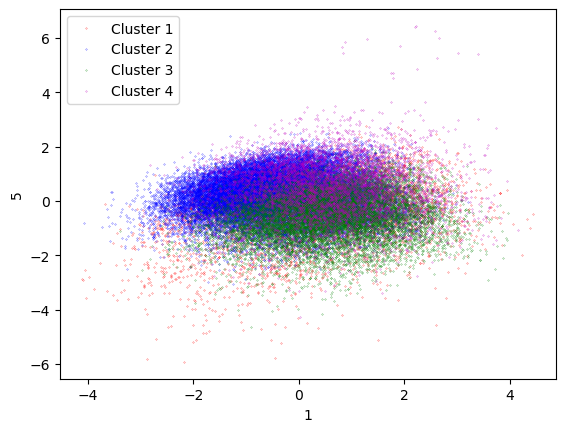

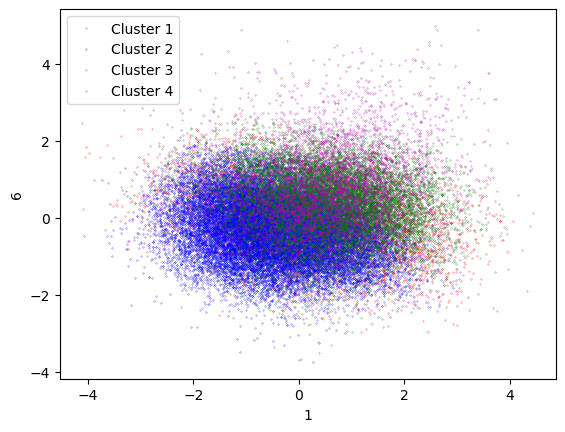

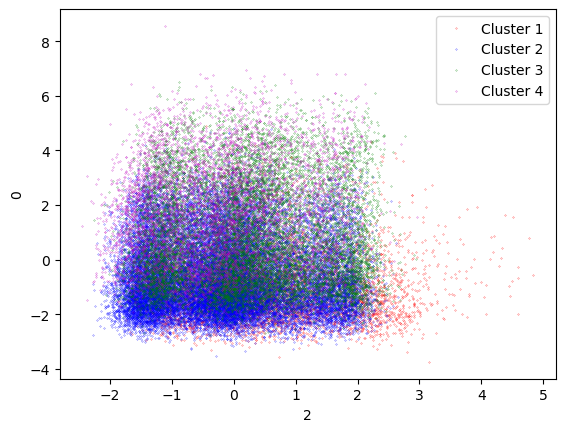

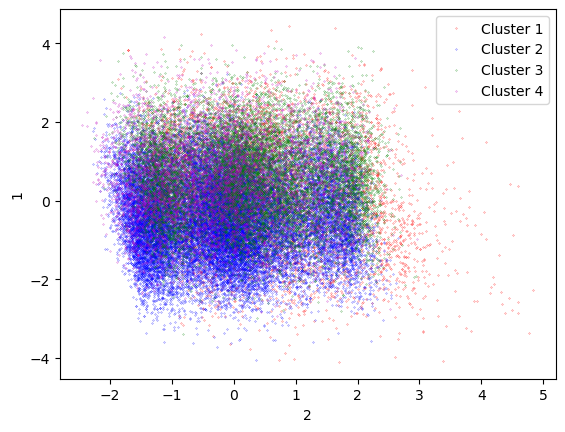

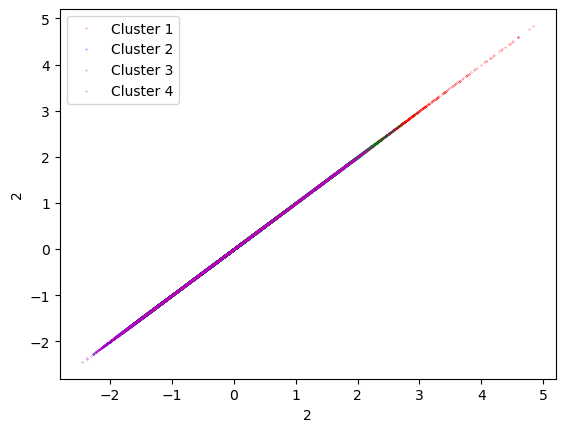

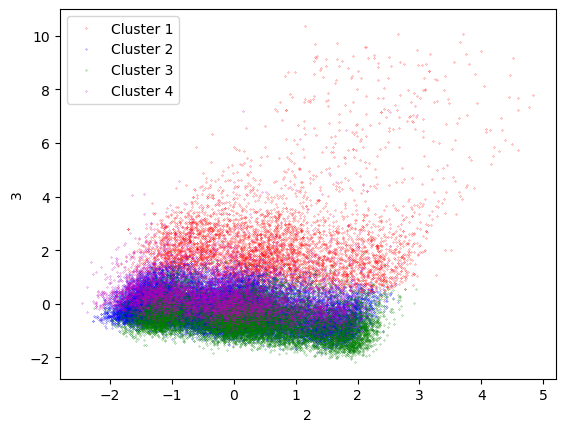

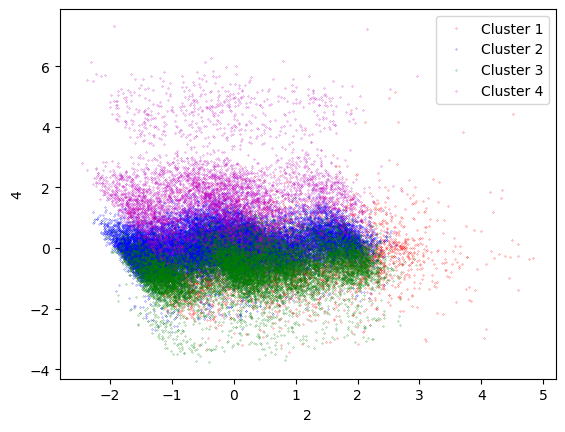

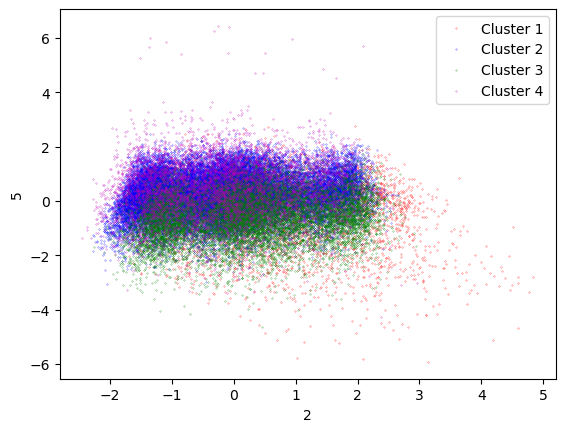

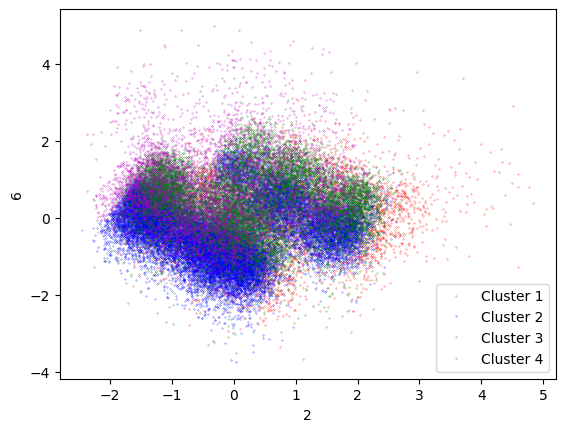

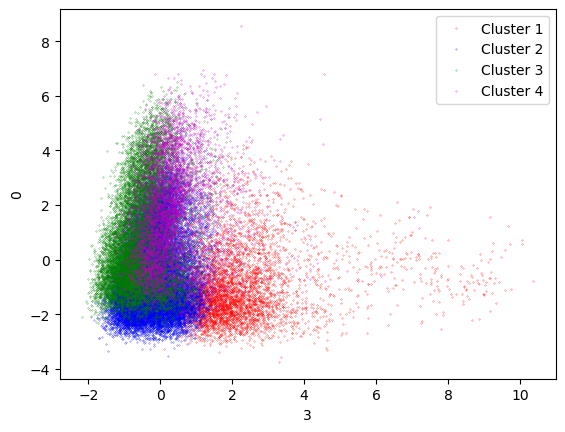

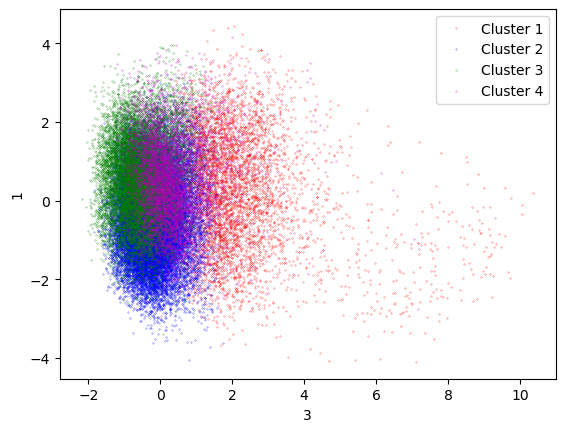

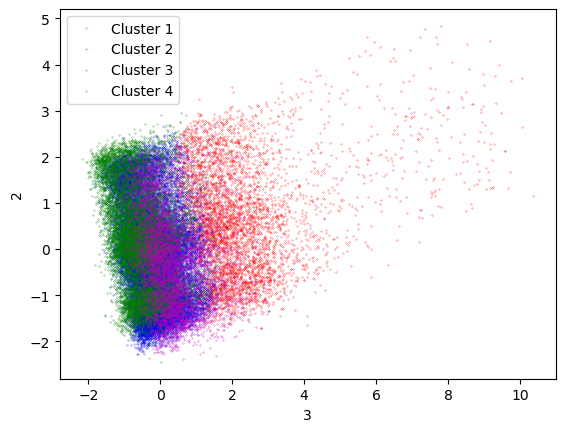

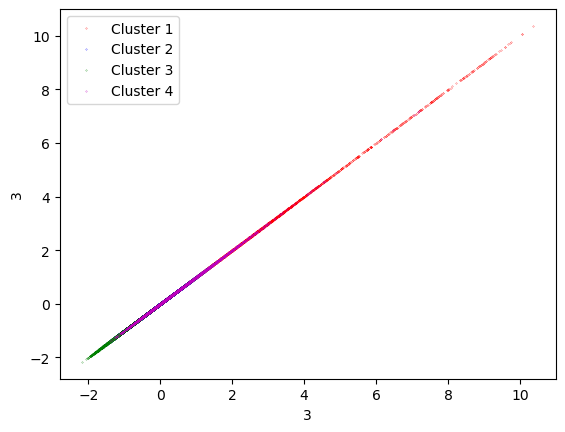

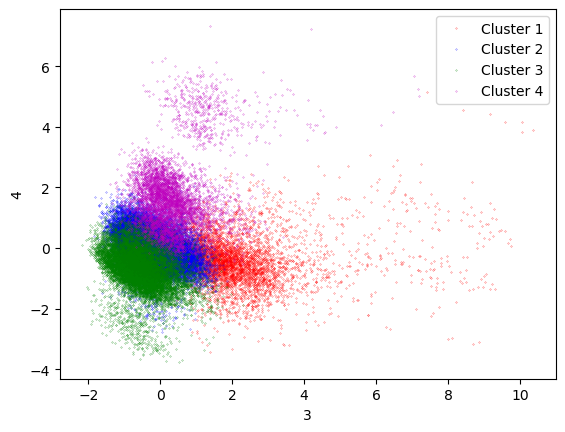

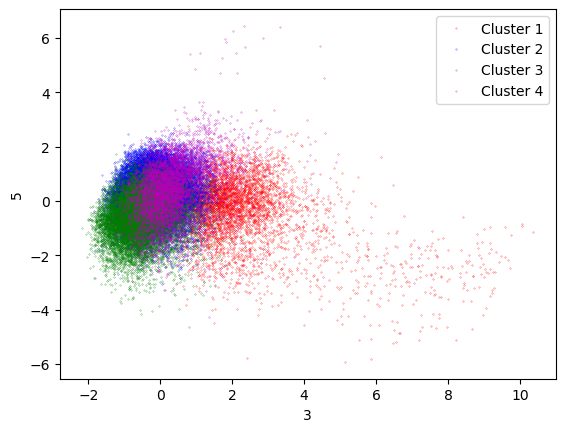

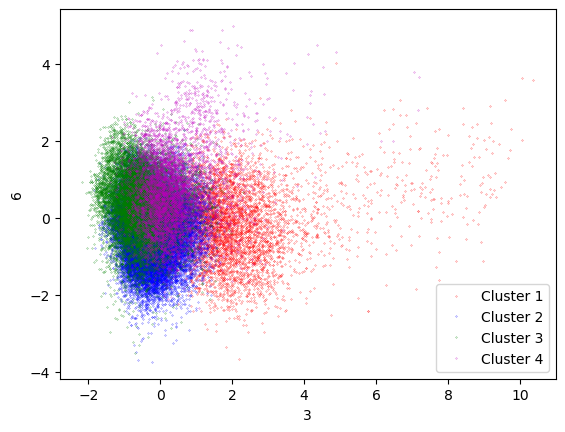

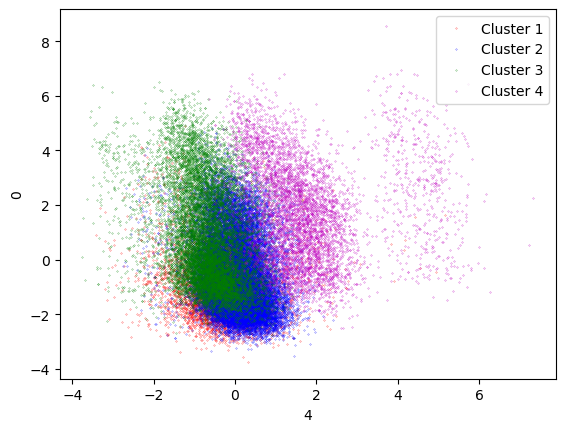

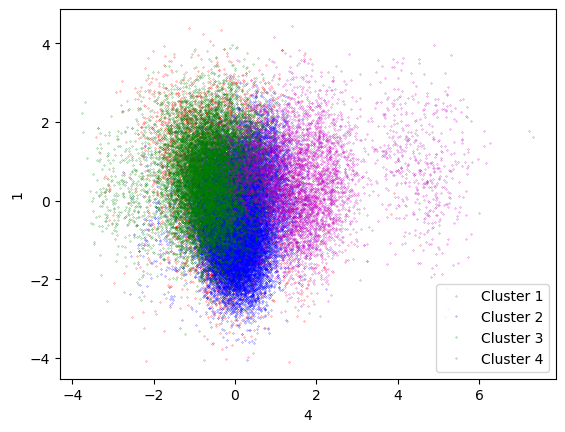

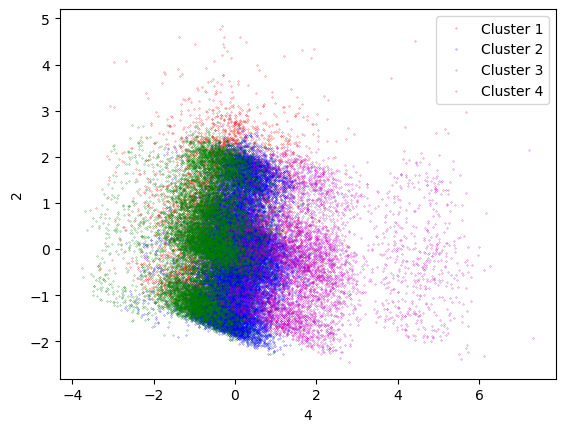

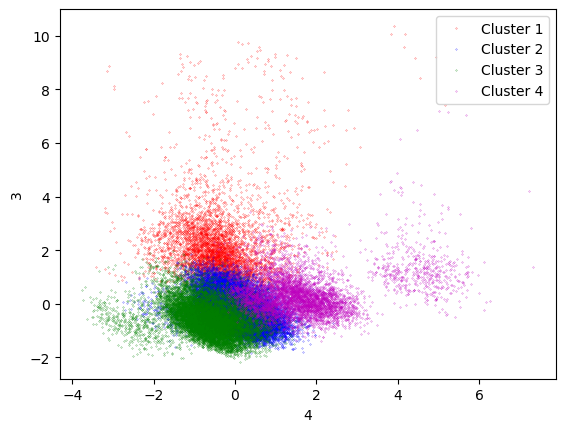

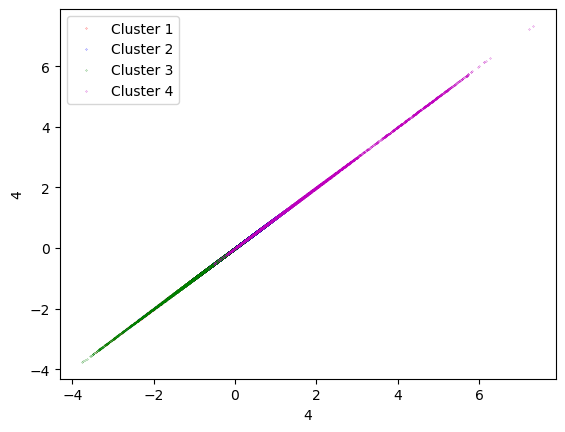

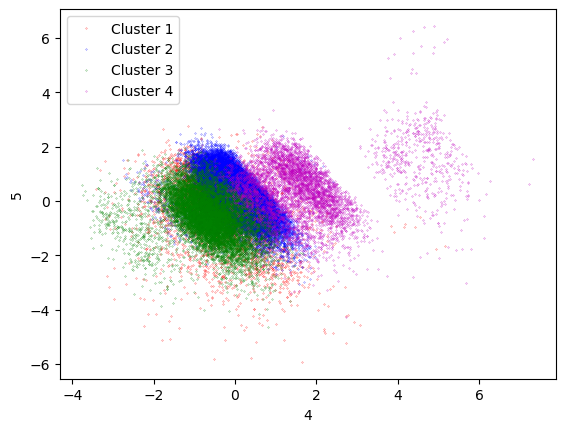

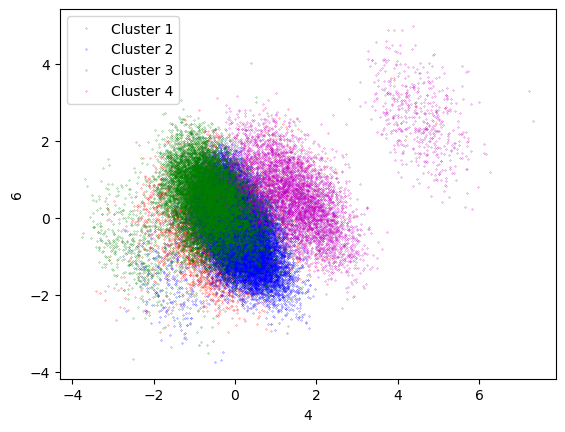

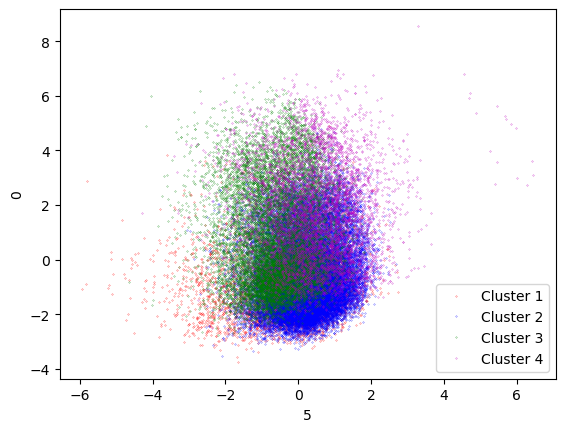

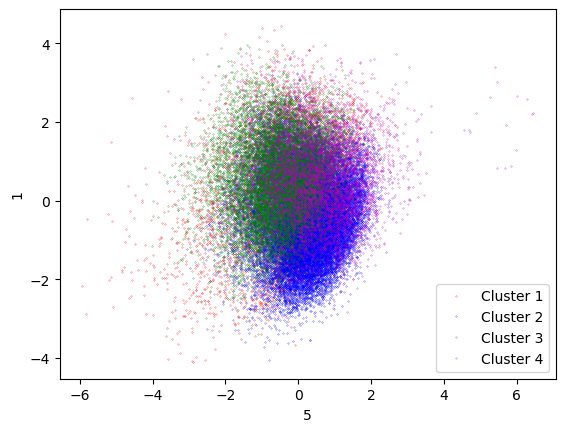

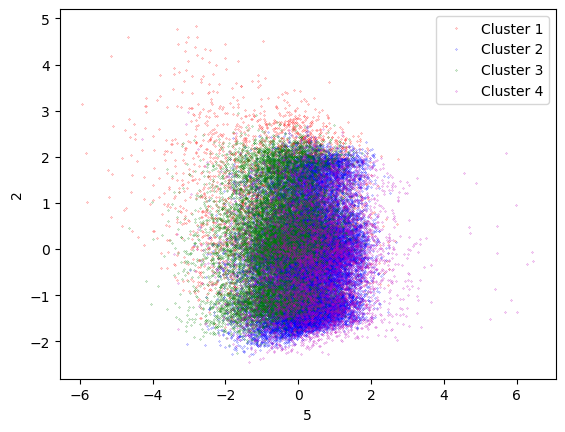

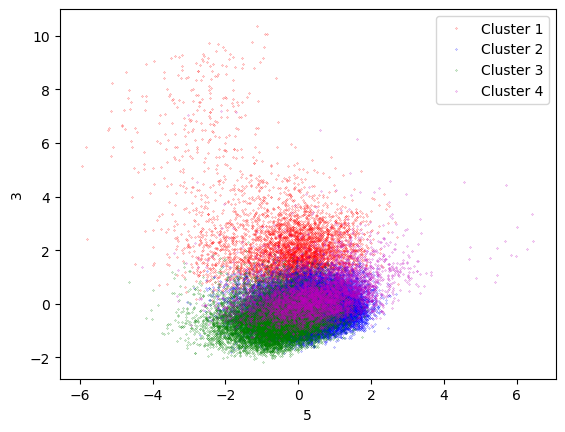

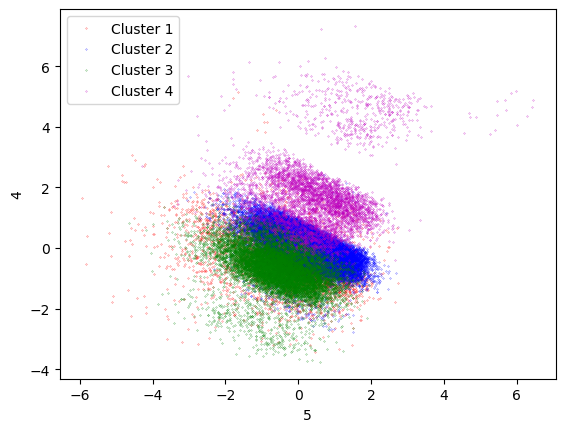

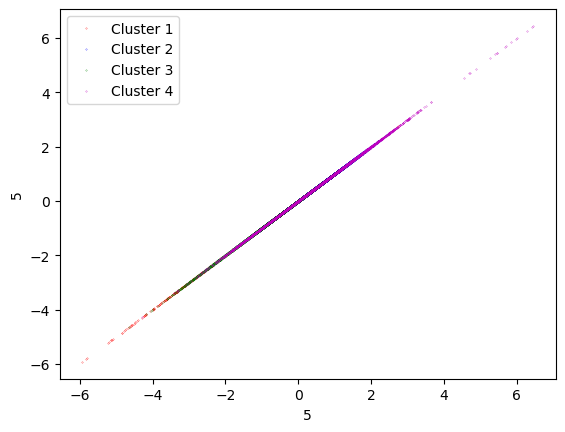

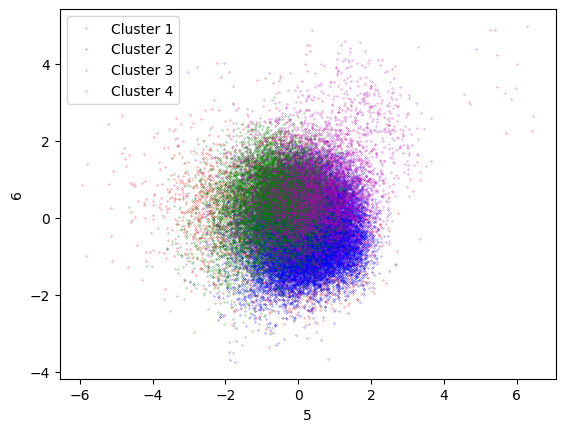

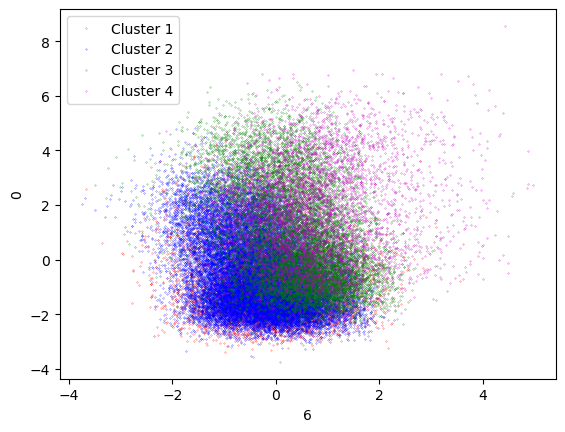

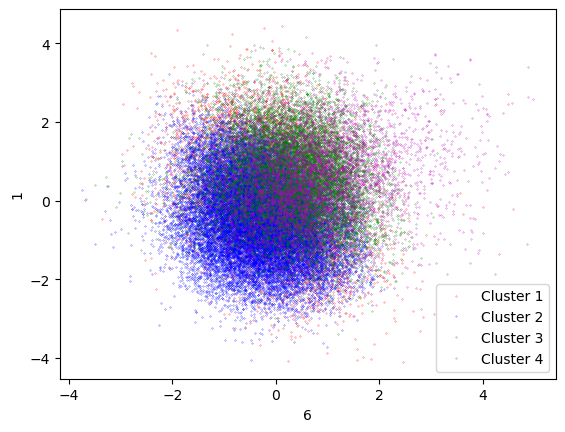

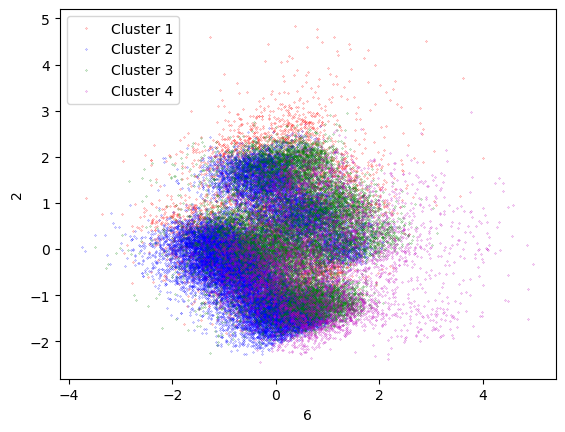

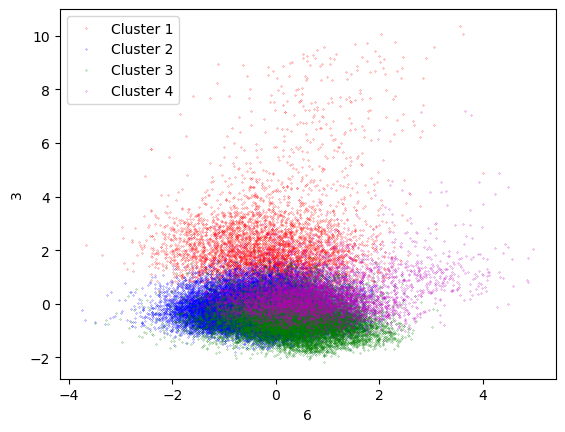

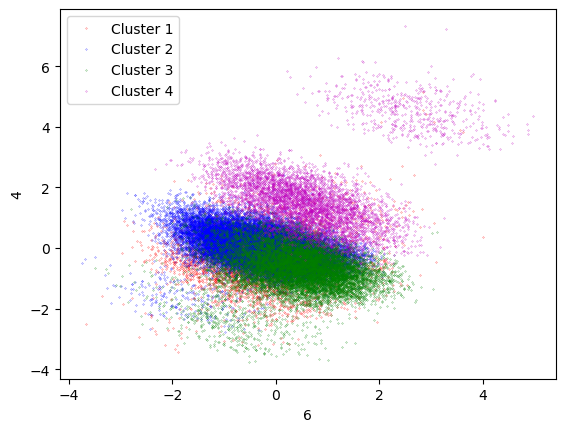

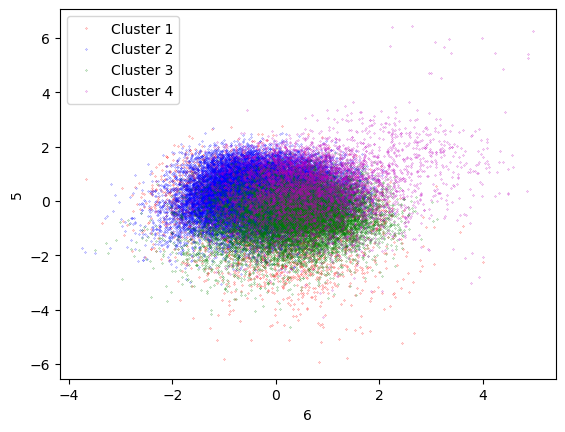

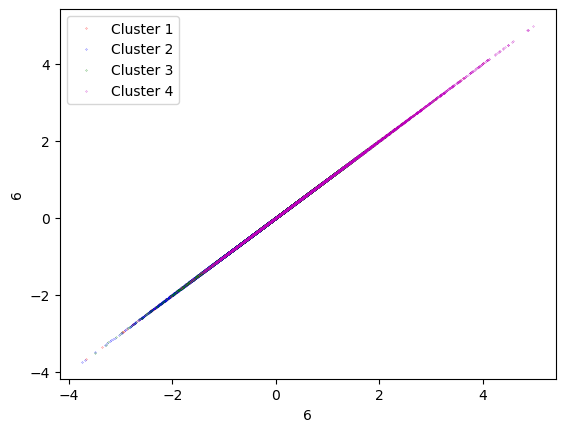

In [7]:
# clustering w/ pca standardized

# cluster_zero = array_of_features[array_of_features["Labels"] == 0]
# cluster_one = array_of_features[array_of_features["Labels"] == 1]
# cluster_two = array_of_features[array_of_features["Labels"] == 2]
# cluster_three = array_of_features[array_of_features["Labels"] == 3]


# plot labels from kmeans run on PCA features

cluster_zero = pca_feat[array_of_features["Labels"] == 0]
cluster_one = pca_feat[array_of_features["Labels"] == 1]
cluster_two = pca_feat[array_of_features["Labels"] == 2]
cluster_three = pca_feat[array_of_features["Labels"] == 3]

for (choice_1, choice_2) in itertools.product(list_of_rows, repeat=2):
    plt.plot(cluster_zero[choice_1], cluster_zero[choice_2], "ro", label="Cluster 1", markersize=.2)
    plt.plot(cluster_one[choice_1], cluster_one[choice_2], "bo", label="Cluster 2", markersize=.2)
    plt.plot(cluster_two[choice_1], cluster_two[choice_2], "go", label="Cluster 3", markersize=.2)
    plt.plot(cluster_three[choice_1], cluster_three[choice_2], "mo", label="Cluster 4", markersize=.2)

    plt.xlabel(choice_1)
    plt.ylabel(choice_2)

    plt.legend()

    plt.show()

In [5]:
# k-means with 3 pca components

array_of_features = pd.read_csv("kmeans_pca_3.csv")
array_of_features = array_of_features.drop("Unnamed: 0", axis=1)


pca_feat = pd.read_csv("pca_3.csv")
pca_feat = pca_feat.drop("Unnamed: 0", axis=1)

feature_data = pd.read_csv("relevant_features_single_tags.csv")
feature_data["loudness"] *= -1
for column in feature_data.keys():
    feature_data[column] = feature_data[column] /feature_data[column].abs().max()
array_of_standardized_features = feature_data

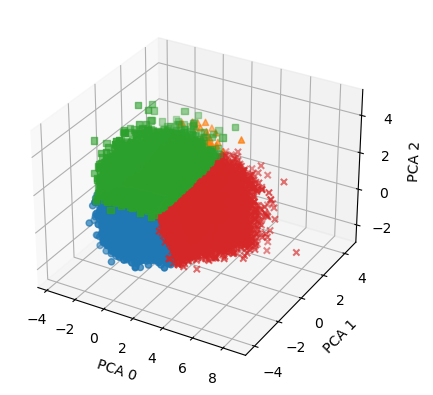

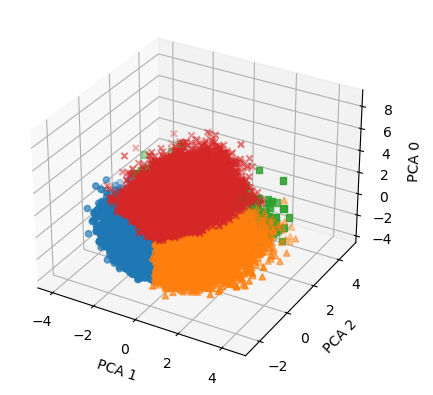

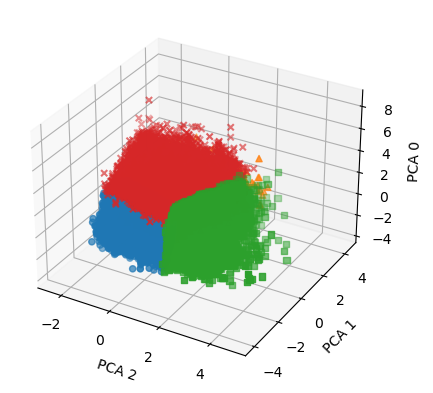

In [6]:
cluster_zero = pca_feat[array_of_features["Labels"] == 0]
cluster_one = pca_feat[array_of_features["Labels"] == 1]
cluster_two = pca_feat[array_of_features["Labels"] == 2]
cluster_three = pca_feat[array_of_features["Labels"] == 3]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(cluster_zero,'o'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x')]:
    xs = cluster['0']
    ys = cluster['1']
    zs = cluster['2']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(cluster_zero,'o'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x')]:
    xs = cluster['1']
    ys = cluster['2']
    zs = cluster['0']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 0')

plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(cluster_zero,'o'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x')]:
    xs = cluster['2']
    ys = cluster['1']
    zs = cluster['0']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 2')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 0')

plt.show()
